## PCA visualization on multiple datasets

1. COIL-20 dataset

In [1]:
# import libraries
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

In [2]:
def parse_image_label_coil(filename):
    f = filename.split('_')[0]
    f = f.replace('obj', '')
    return int(f)
def plot_pca_2d(principa_components, labels, title):
    """Visualize the PCA results in 2D
    Args:
        principal_components: the principal components, shape N x 2
        labels: the labels of the data, shape N x 1
        title: the title of the plot
    """
    plt.figure(figsize=(10, 10))
    plt.scatter(principa_components[:, 0], principa_components[:, 1], alpha=0.5,c=labels)
    plt.colorbar()
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title(title)
    plt.show()

images.shape: (1440, 128, 128, 3)
labels.shape: (1440,)


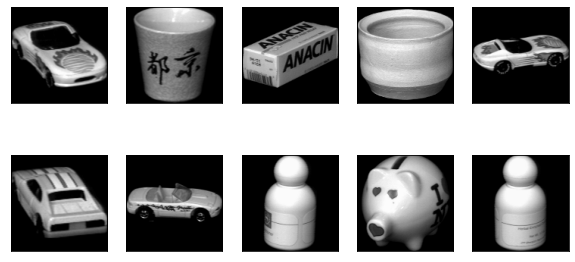

In [3]:
# import coil-20 dataset
data_path = './data/coil-20/coil-20-proc/'

images = []
labels = []

for filepath in os.listdir(data_path):
    f = os.path.join(data_path, filepath)
    img = cv2.imread(f)
    images.append(img)
    labels.append(parse_image_label_coil(filepath))

images = np.array(images)
labels = np.array(labels)
print(f"images.shape: {images.shape}")
print(f"labels.shape: {labels.shape}")
random_indices = np.random.randint(0, images.shape[0], 10)
random_images = images[random_indices]
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(random_images[i], cmap='gray')
    ax.set(xticks=[], yticks=[])
plt.show()



In [4]:
# run pca on the dataset

# flatten the images
images_flat = images.reshape(images.shape[0], -1)

# run pca
pca = PCA(n_components=2)
pca.fit(images_flat)
images_pca = pca.transform(images_flat)
print(f"images_pca.shape: {images_pca.shape}")

images_pca.shape: (1440, 2)


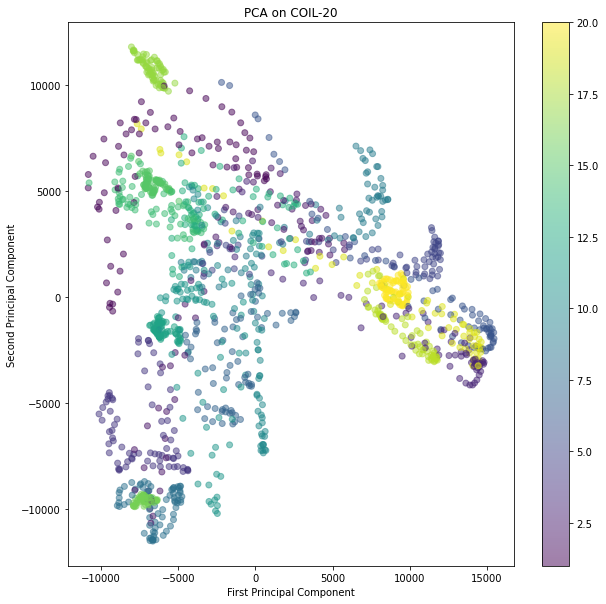

In [5]:
plot_pca_2d(images_pca, labels, 'PCA on COIL-20')

## Netflix dataset

In [6]:
# load the dataset
df = pd.read_csv('./data/netflix-dataset/netflix_titles.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
# clean the dataset
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            df[column] = list(map(convert_to_int, df[column]))

    return df

df = handle_non_numerical_data(df)
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,7895,1,6539,3188,0,720,134,2020,15,105,121,289
1,1360,0,3914,0,3704,148,1646,2021,6,70,373,6968
2,8675,0,3685,1294,6621,0,1646,2021,6,219,42,3758
3,2206,0,552,0,0,0,1646,2021,6,219,76,3214
4,5417,0,2613,0,2797,196,1646,2021,6,70,109,5610


In [8]:
# run pca on the dataset
X = df.drop('show_id', axis=1)
X = X.drop('title', axis=1)
X = X.drop('type', axis=1)
y = df['type']
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print(f"X_pca.shape: {X_pca.shape}")


X_pca.shape: (8807, 2)


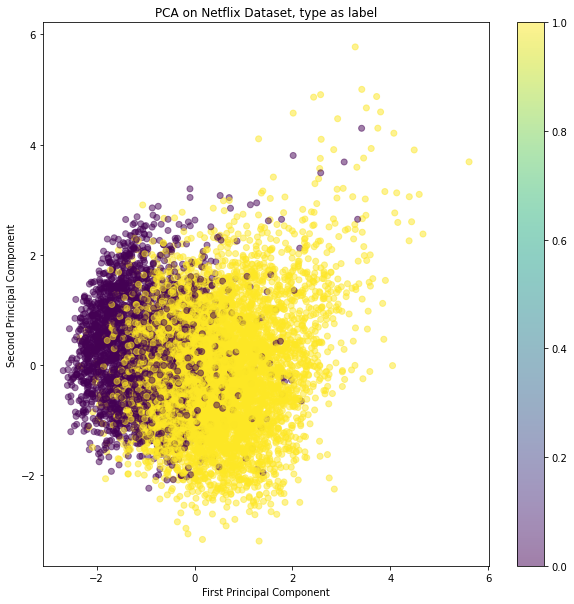

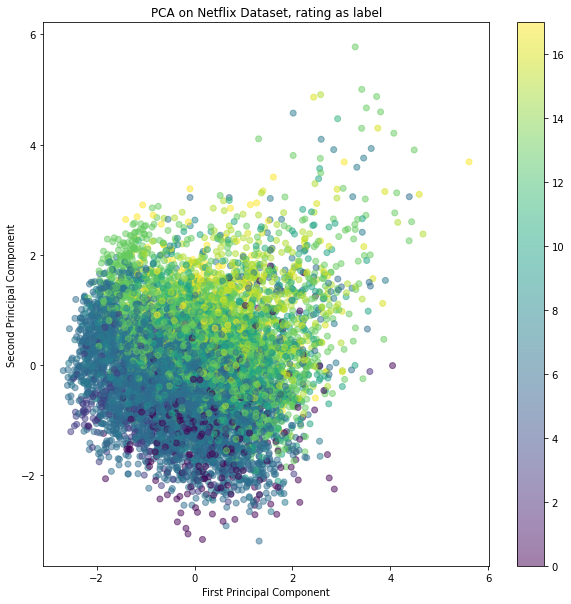

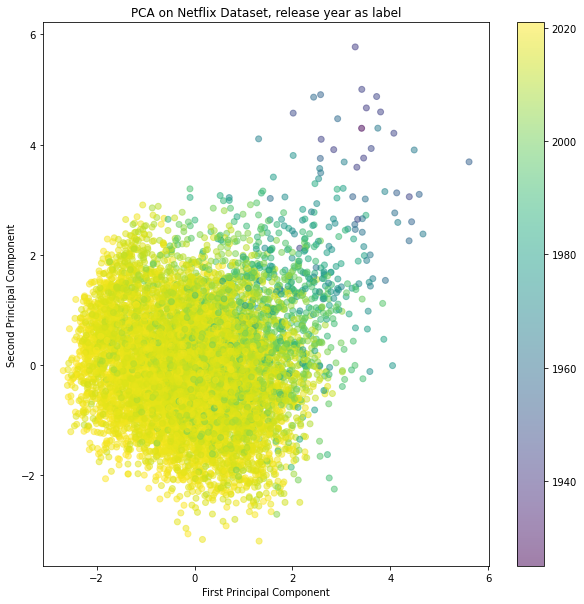

In [9]:
# plot with type as label
plot_pca_2d(X_pca, y, 'PCA on Netflix Dataset, type as label')

# plot with rating as label
y = df['rating']
plot_pca_2d(X_pca, y, 'PCA on Netflix Dataset, rating as label')

# plot with release year as label
y = df['release_year']
plot_pca_2d(X_pca, y, 'PCA on Netflix Dataset, release year as label')
